# SCADA ML paper

In [3]:
!pip install networkx

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 1.2 MB/s eta 0:00:02
   --------------- ------------------------ 0.8/2.1 MB 1.1 MB/s eta 0:00:02
   -------------------- ------------------- 1.0/2.1 MB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.3/2.1 MB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.1 MB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 1.8/2.1 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 1.2 MB/s eta 0:00:00


## Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import kneighbors_graph
import networkx as nx
import warnings

warnings.filterwarnings('ignore')

## Data loading and preprocessing

In [2]:
print("=" * 70)
print("LOADING AND PREPROCESSING DATA")
print("=" * 70)

df = pd.read_csv(r"C:\Users\risto\PycharmProjects\ids-scada-ml\data\scadadataset.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset info:")
print(df.info())
print(f"\nClass distribution:")
print(df.iloc[:, -1].value_counts())

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

LOADING AND PREPROCESSING DATA
Dataset shape: (7037983, 7)

First few rows:
   Sport  TotPkts  TotBytes  SrcPkts  DstPkts  SrcBytes  Target
0    143        2       180        2        0       180       0
1     68        2       684        2        0       684       0
2      0        1        60        1        0        60       0
3  54949       10       628        4        6       248       0
4  54943        8       496        4        4       248       0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7037983 entries, 0 to 7037982
Data columns (total 7 columns):
 #   Column    Dtype
---  ------    -----
 0   Sport     int64
 1   TotPkts   int64
 2   TotBytes  int64
 3   SrcPkts   int64
 4   DstPkts   int64
 5   SrcBytes  int64
 6   Target    int64
dtypes: int64(7)
memory usage: 375.9 MB
None

Class distribution:
Target
0    6634581
1     403402
Name: count, dtype: int64

Training set size: 5630386
Test set size: 1407597


## Helper functions

In [3]:
def calculate_metrics(y_true, y_pred):
    """Calculate ACC, FAR, and UND"""
    cm = confusion_matrix(y_true, y_pred)

    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    ACC = ((TP + TN) / (TP + TN + FP + FN)) * 100

    FAR = (FP / (FP + TN)) * 100 if (FP + TN) > 0 else 0

    UND = (FN / (FN + TP)) * 100 if (FN + TP) > 0 else 0

    return {
        'TN': TN, 'FP': FP, 'FN': FN, 'TP': TP,
        'Accuracy': ACC, 'FAR': FAR, 'UND': UND
    }


def print_metrics(model_name, metrics):
    print(f"\n{model_name} Results:")
    print("-" * 50)
    print(f"Confusion Matrix:")
    print(f"  TN: {metrics['TN']:6d}  |  FP: {metrics['FP']:6d}")
    print(f"  FN: {metrics['FN']:6d}  |  TP: {metrics['TP']:6d}")
    print(f"\nPerformance Metrics:")
    print(f"  Accuracy (ACC):        {metrics['Accuracy']:.2f}%")
    print(f"  False Alarm Rate (FAR): {metrics['FAR']:.2f}%")
    print(f"  Un-Detection Rate (UND): {metrics['UND']:.2f}%")


results = {}


## Logistic regression

In [9]:
print("\n" + "=" * 70)
print("LOGISTIC REGRESSION")
print("=" * 70)

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_metrics = calculate_metrics(y_test, lr_pred)
results['Logistic Regression'] = lr_metrics
print_metrics('Logistic Regression', lr_metrics)


LOGISTIC REGRESSION

Logistic Regression Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1325420  |  FP:   1497
  FN:    382  |  TP:  80298

Performance Metrics:
  Accuracy (ACC):        99.87%
  False Alarm Rate (FAR): 0.11%
  Un-Detection Rate (UND): 0.47%


## Random forest

In [10]:
print("\n" + "=" * 70)
print("RANDOM FOREST")
print("=" * 70)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_metrics = calculate_metrics(y_test, rf_pred)
results['Random Forest'] = rf_metrics
print_metrics('Random Forest', rf_metrics)


RANDOM FOREST

Random Forest Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1326917  |  FP:      0
  FN:      1  |  TP:  80679

Performance Metrics:
  Accuracy (ACC):        100.00%
  False Alarm Rate (FAR): 0.00%
  Un-Detection Rate (UND): 0.00%


In [7]:
print("\n" + "=" * 70)
print("RANDOM FOREST")
print("=" * 70)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_metrics = calculate_metrics(y_test, rf_pred)
results['Random Forest'] = rf_metrics
print_metrics('Random Forest', rf_metrics)


RANDOM FOREST

Random Forest Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1326917  |  FP:      0
  FN:      1  |  TP:  80679

Performance Metrics:
  Accuracy (ACC):        100.00%
  False Alarm Rate (FAR): 0.00%
  Un-Detection Rate (UND): 0.00%


## Naive Bayes

In [6]:
print("\n" + "=" * 70)
print("NAIVE BAYES")
print("=" * 70)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)

nb_metrics = calculate_metrics(y_test, nb_pred)
results['Naive Bayes'] = nb_metrics
print_metrics('Naive Bayes', nb_metrics)


NAIVE BAYES

Naive Bayes Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1320294  |  FP:   6623
  FN:    382  |  TP:  80298

Performance Metrics:
  Accuracy (ACC):        99.50%
  False Alarm Rate (FAR): 0.50%
  Un-Detection Rate (UND): 0.47%


##  K-NEAREST NEIGHBORS (KNN)

In [7]:
print("\n" + "=" * 70)
print("K-NEAREST NEIGHBORS (KNN)")
print("=" * 70)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

knn_metrics = calculate_metrics(y_test, knn_pred)
results['KNN'] = knn_metrics
print_metrics('KNN', knn_metrics)


K-NEAREST NEIGHBORS (KNN)

KNN Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1326778  |  FP:    139
  FN:     76  |  TP:  80604

Performance Metrics:
  Accuracy (ACC):        99.98%
  False Alarm Rate (FAR): 0.01%
  Un-Detection Rate (UND): 0.09%


## Decision Tree

In [8]:
print("\n" + "=" * 70)
print("DECISION TREE")
print("=" * 70)

dt_model = DecisionTreeClassifier(random_state=42, max_depth=20)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_metrics = calculate_metrics(y_test, dt_pred)
results['Decision Tree'] = dt_metrics
print_metrics('Decision Tree', dt_metrics)


DECISION TREE

Decision Tree Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1326917  |  FP:      0
  FN:      1  |  TP:  80679

Performance Metrics:
  Accuracy (ACC):        100.00%
  False Alarm Rate (FAR): 0.00%
  Un-Detection Rate (UND): 0.00%


##  Comparison results


GENERATING COMPARISON CHARTS

Summary Table:
              Model  Accuracy (%)  FAR (%)  UND (%)
        Naive Bayes     99.502343 0.499127 0.473475
                KNN     99.984726 0.010475 0.094199
      Decision Tree     99.999929 0.000000 0.001239
      Random Forest     99.999929 0.000000 0.001239
Logistic Regression     99.866510 0.112818 0.473475


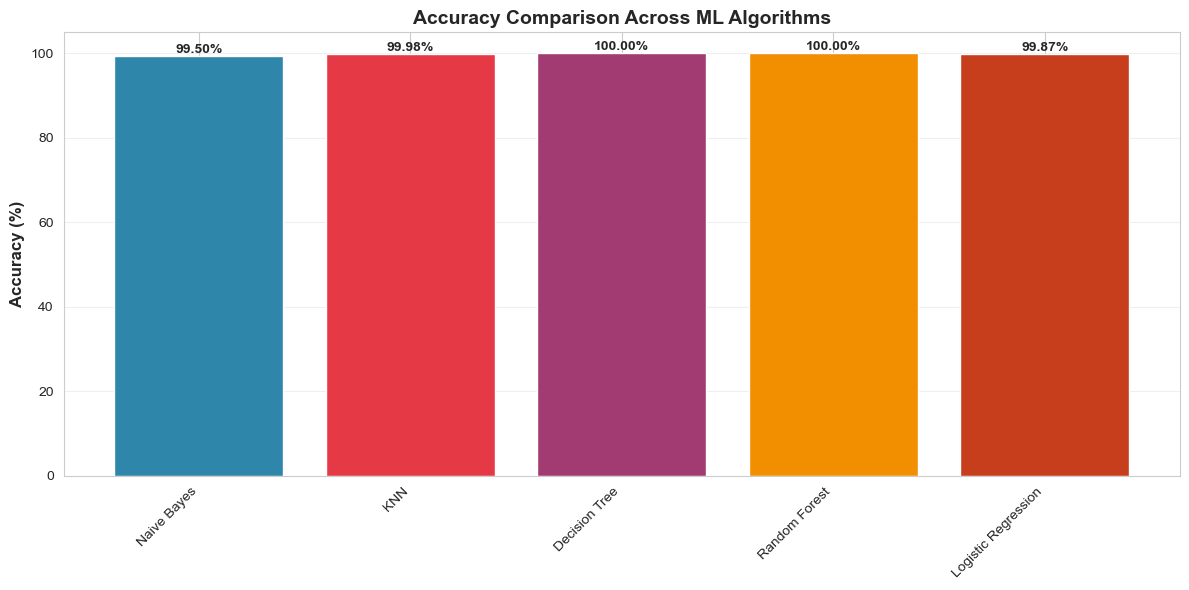

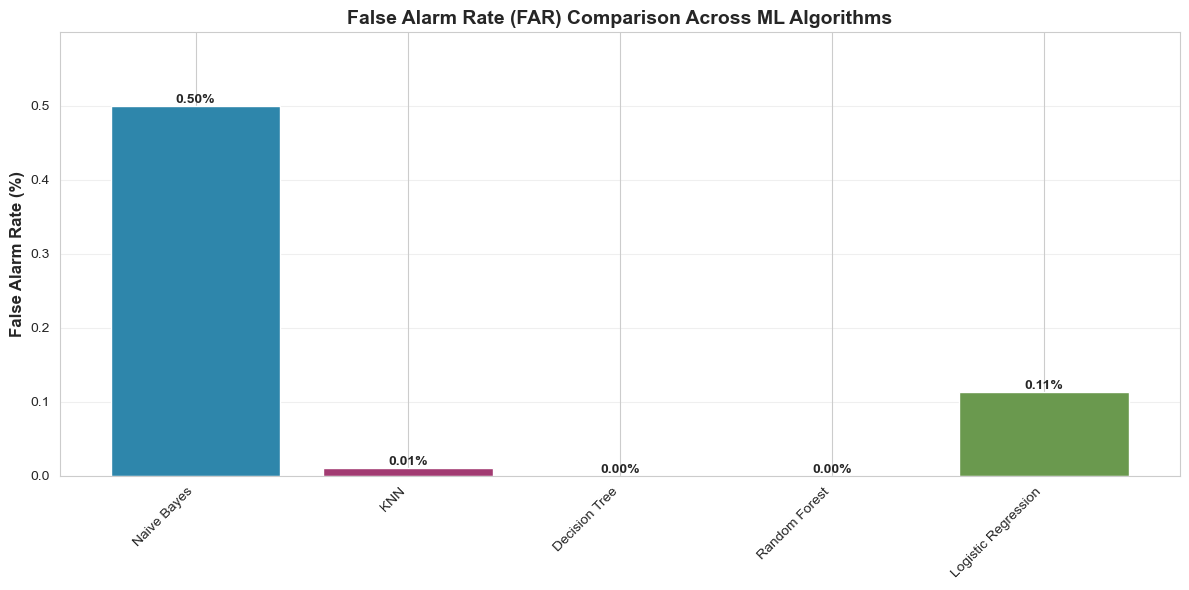

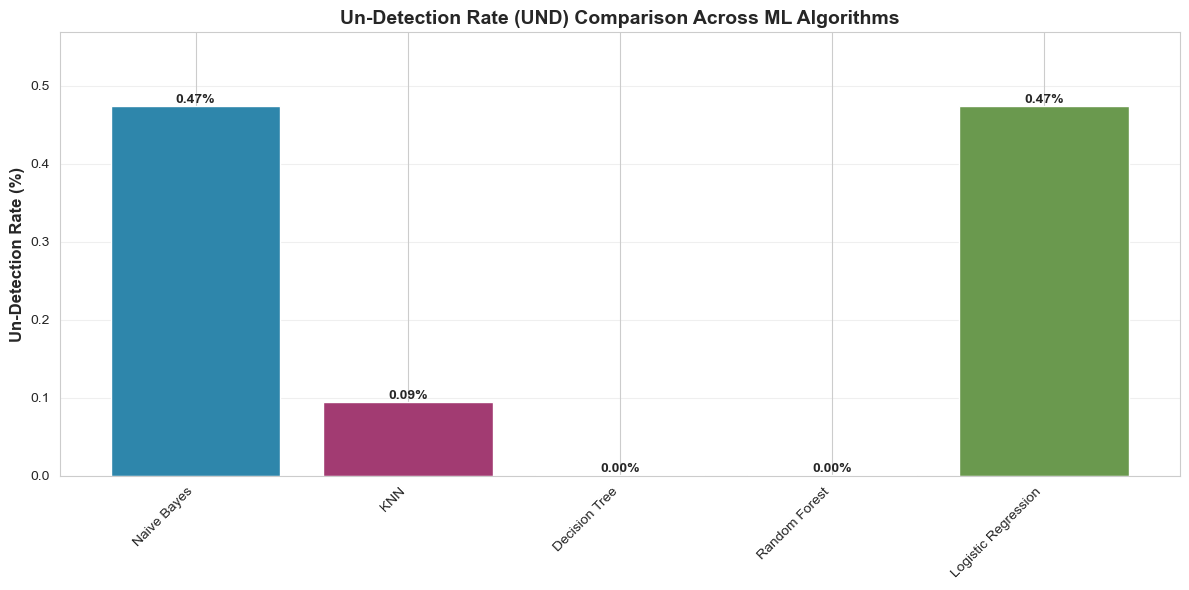

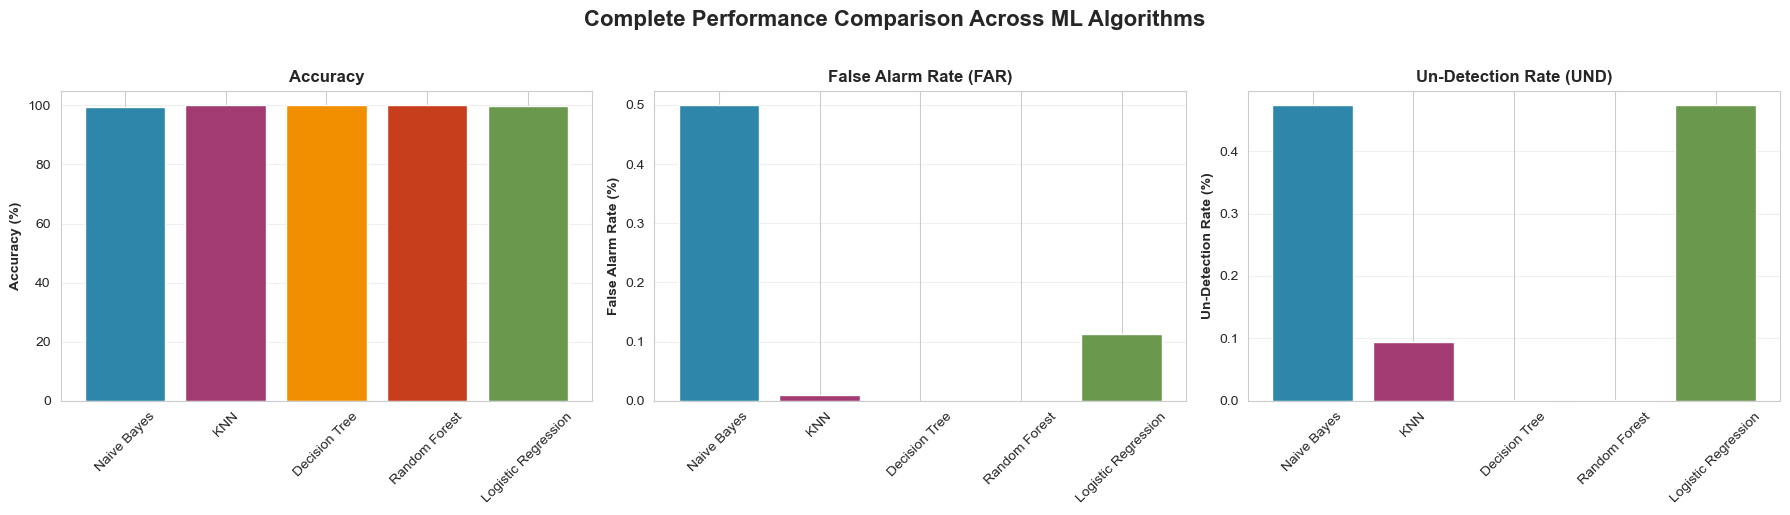

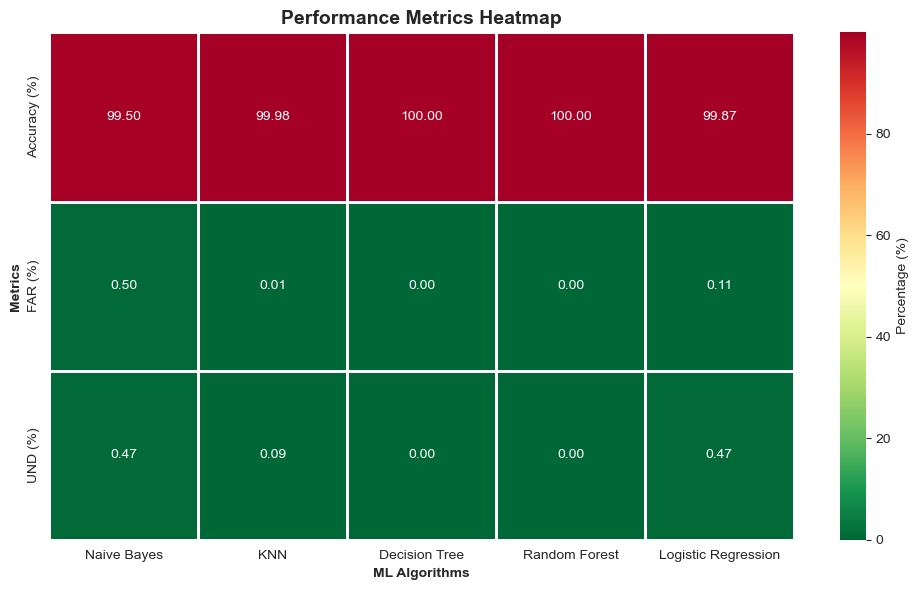


ANALYSIS COMPLETE!


In [12]:
print("\n" + "=" * 70)
print("GENERATING COMPARISON CHARTS")
print("=" * 70)

# Prepare data for visualization
models = list(results.keys())
accuracy = [results[m]['Accuracy'] for m in models]
far = [results[m]['FAR'] for m in models]
und = [results[m]['UND'] for m in models]

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy (%)': accuracy,
    'FAR (%)': far,
    'UND (%)': und
})

print("\nSummary Table:")
print(comparison_df.to_string(index=False))

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracy, color=['#2E86AB', '#E63946', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#457B9D'])
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Accuracy Comparison Across ML Algorithms', fontsize=14, fontweight='bold')
plt.ylim([0, 105])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(models, far, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])
plt.ylabel('False Alarm Rate (%)', fontsize=12, fontweight='bold')
plt.title('False Alarm Rate (FAR) Comparison Across ML Algorithms', fontsize=14, fontweight='bold')
plt.ylim([0, max(far) * 1.2])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(models, und, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])
plt.ylabel('Un-Detection Rate (%)', fontsize=12, fontweight='bold')
plt.title('Un-Detection Rate (UND) Comparison Across ML Algorithms', fontsize=14, fontweight='bold')
plt.ylim([0, max(und) * 1.2])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axes[0].bar(models, accuracy, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])
axes[0].set_ylabel('Accuracy (%)', fontweight='bold')
axes[0].set_title('Accuracy', fontweight='bold', fontsize=12)
axes[0].set_ylim([0, 105])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# FAR
axes[1].bar(models, far, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])
axes[1].set_ylabel('False Alarm Rate (%)', fontweight='bold')
axes[1].set_title('False Alarm Rate (FAR)', fontweight='bold', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# UND
axes[2].bar(models, und, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E'])
axes[2].set_ylabel('Un-Detection Rate (%)', fontweight='bold')
axes[2].set_title('Un-Detection Rate (UND)', fontweight='bold', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Complete Performance Comparison Across ML Algorithms',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
heatmap_data = comparison_df.set_index('Model')[['Accuracy (%)', 'FAR (%)', 'UND (%)']]
sns.heatmap(heatmap_data.T, annot=True, fmt='.2f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Percentage (%)'}, linewidths=1)
plt.title('Performance Metrics Heatmap', fontsize=14, fontweight='bold')
plt.ylabel('Metrics', fontweight='bold')
plt.xlabel('ML Algorithms', fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE!")
print("=" * 70)

##  Label propagation


GRAPH-BASED MACHINE LEARNING - LABEL PROPAGATION

Label Propagation is a semi-supervised method that spreads known attack labels 
across a network graph. We'll simulate a scenario where only 20% of training 
data is labeled, and the algorithm propagates labels to unlabeled nodes based 
on network connections.

Total training samples: 5630386
  Normal samples: 5307664
  Attack samples: 322722

Labeled samples: 1126076 (20% from each class)
  Labeled normal: 1061532
  Labeled attack: 64544
Unlabeled samples: 4504310 (80%)

Building network graph based on feature similarity...

Visualizing network structure (sample of 150 nodes with guaranteed mix)...


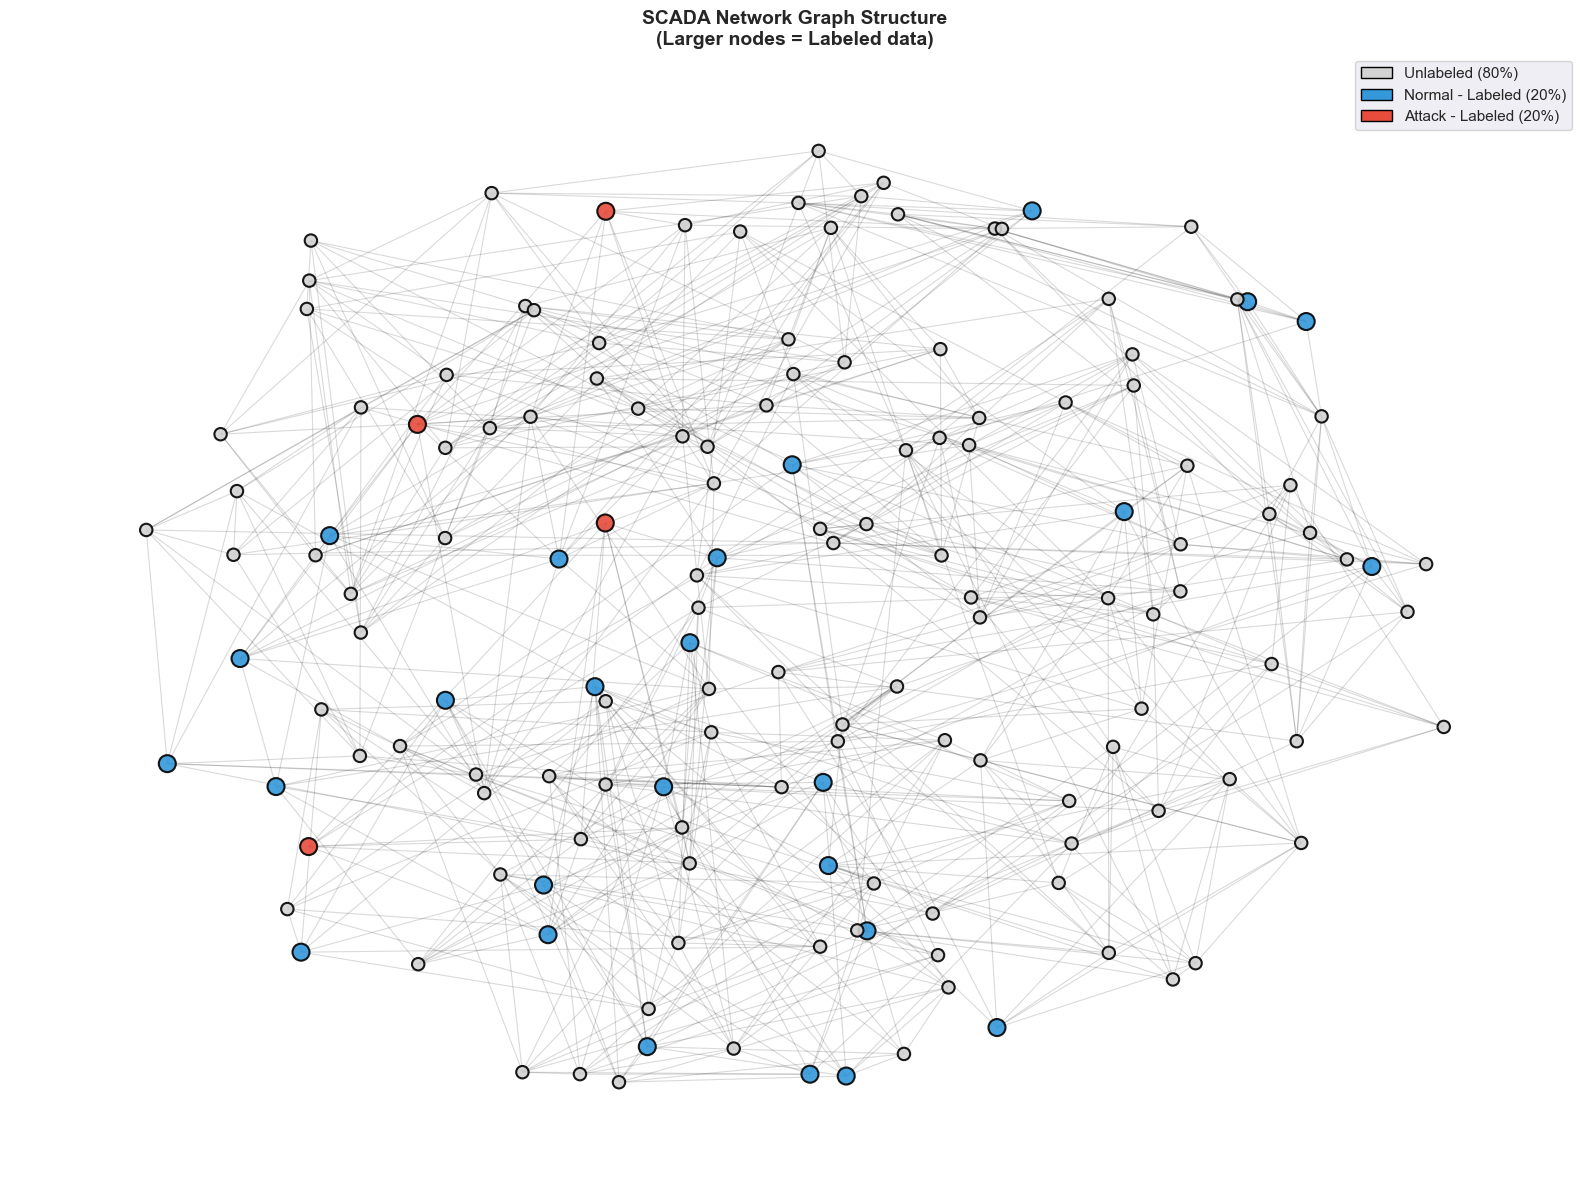


Training Label Propagation model...

Label Propagation Results:
--------------------------------------------------
Confusion Matrix:
  TN: 1326516  |  FP:    401
  FN:    251  |  TP:  80429

Performance Metrics:
  Accuracy (ACC):        99.95%
  False Alarm Rate (FAR): 0.03%
  Un-Detection Rate (UND): 0.31%

Visualizing how labels propagated through the network...


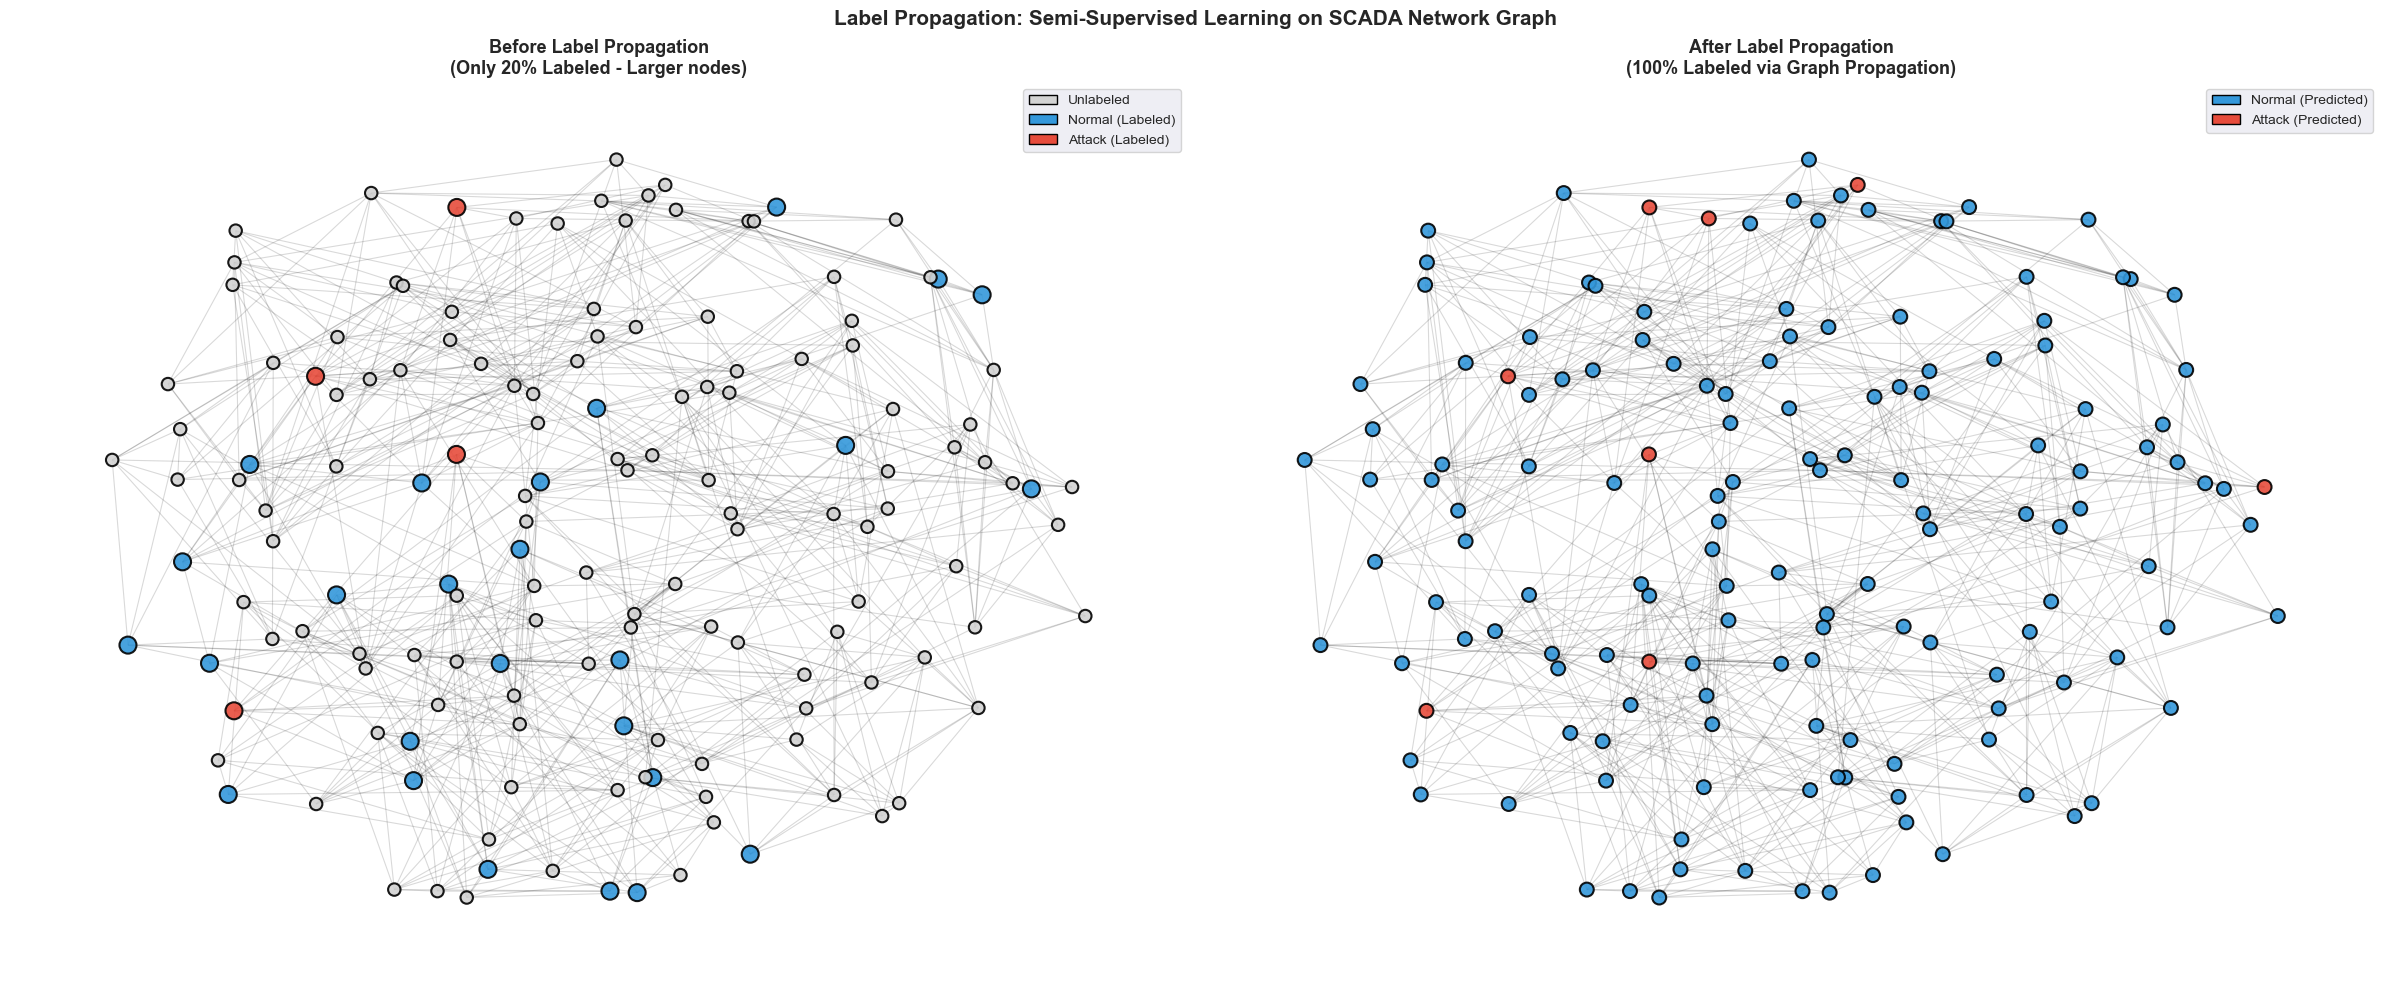


Label Propagation demonstrates how graph-based methods can leverage
network structure to classify attacks even with limited labeled data!


In [15]:
print("\n" + "=" * 70)
print("GRAPH-BASED MACHINE LEARNING - LABEL PROPAGATION")
print("=" * 70)

np.random.seed(42)

normal_indices = np.where(y_train.values == 0)[0]
attack_indices = np.where(y_train.values == 1)[0]

n_labeled_normal = int(0.2 * len(normal_indices))
n_labeled_attack = int(0.2 * len(attack_indices))

labeled_normal = np.random.choice(normal_indices, n_labeled_normal, replace=False)
labeled_attack = np.random.choice(attack_indices, n_labeled_attack, replace=False)

labeled_indices = np.concatenate([labeled_normal, labeled_attack])

y_train_semi = np.full(len(y_train), -1)
y_train_semi[labeled_indices] = y_train.iloc[labeled_indices].values

print(f"Total training samples: {len(y_train)}")
print(f"  Normal samples: {len(normal_indices)}")
print(f"  Attack samples: {len(attack_indices)}")
print(f"\nLabeled samples: {len(labeled_indices)} (20% from each class)")
print(f"  Labeled normal: {n_labeled_normal}")
print(f"  Labeled attack: {n_labeled_attack}")
print(f"Unlabeled samples: {len(y_train) - len(labeled_indices)} (80%)")

print("\nBuilding network graph based on feature similarity...")
n_neighbors = 10
connectivity = kneighbors_graph(X_train_scaled, n_neighbors=n_neighbors, mode='connectivity')

print("\nVisualizing network structure (sample of 150 nodes with guaranteed mix)...")

sample_size = 150
sample_labeled = np.random.choice(labeled_indices, min(30, len(labeled_indices)), replace=False)
sample_unlabeled = np.random.choice(
    [i for i in range(len(y_train)) if i not in labeled_indices],
    sample_size - len(sample_labeled),
    replace=False
)
sample_indices = np.concatenate([sample_labeled, sample_unlabeled])

sample_connectivity = kneighbors_graph(
    X_train_scaled[sample_indices],
    n_neighbors=min(7, len(sample_indices) - 1),
    mode='connectivity'
)

# Create NetworkX graph for visualization
G = nx.from_scipy_sparse_array(sample_connectivity)
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)

node_colors = []
node_sizes = []
for idx in sample_indices:
    if y_train_semi[idx] == -1:
        node_colors.append('lightgray')  # Unlabeled
        node_sizes.append(80)
    elif y_train_semi[idx] == 0:
        node_colors.append('#3498db')  # Normal (labeled) - bright blue
        node_sizes.append(150)
    else:
        node_colors.append('#e74c3c')  # Attack (labeled) - bright red
        node_sizes.append(150)

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9, edgecolors='black',
                       linewidths=1.5)
nx.draw_networkx_edges(G, pos, alpha=0.15, width=0.8)

from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='lightgray', edgecolor='black', label='Unlabeled (80%)'),
    Patch(facecolor='#3498db', edgecolor='black', label='Normal - Labeled (20%)'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Attack - Labeled (20%)')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.title('SCADA Network Graph Structure\n(Larger nodes = Labeled data)',
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("\nTraining Label Propagation model...")
lp_model = LabelPropagation(kernel='knn', n_neighbors=n_neighbors, max_iter=1000)
lp_model.fit(X_train_scaled, y_train_semi)

lp_pred = lp_model.predict(X_test_scaled)

lp_metrics = calculate_metrics(y_test, lp_pred)
results['Label Propagation'] = lp_metrics
print_metrics('Label Propagation', lp_metrics)

print("\nVisualizing how labels propagated through the network...")
predicted_labels_train = lp_model.transduction_

node_colors_after = []
node_sizes_after = []
for idx in sample_indices:
    if predicted_labels_train[idx] == 0:
        node_colors_after.append('#3498db')  # Normal - bright blue
    else:
        node_colors_after.append('#e74c3c')  # Attack - bright red
    node_sizes_after.append(100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Before propagation
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9,
                       edgecolors='black', linewidths=1.5, ax=ax1)
nx.draw_networkx_edges(G, pos, alpha=0.15, width=0.8, ax=ax1)
ax1.set_title('Before Label Propagation\n(Only 20% Labeled - Larger nodes)', fontsize=13, fontweight='bold')
ax1.axis('off')

legend_elements_before = [
    Patch(facecolor='lightgray', edgecolor='black', label='Unlabeled'),
    Patch(facecolor='#3498db', edgecolor='black', label='Normal (Labeled)'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Attack (Labeled)')
]
ax1.legend(handles=legend_elements_before, loc='upper right', fontsize=10)

# After propagation
nx.draw_networkx_nodes(G, pos, node_color=node_colors_after, node_size=node_sizes_after,
                       alpha=0.9, edgecolors='black', linewidths=1.5, ax=ax2)
nx.draw_networkx_edges(G, pos, alpha=0.15, width=0.8, ax=ax2)
ax2.set_title('After Label Propagation\n(100% Labeled via Graph Propagation)', fontsize=13, fontweight='bold')
ax2.axis('off')

legend_elements_after = [
    Patch(facecolor='#3498db', edgecolor='black', label='Normal (Predicted)'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Attack (Predicted)')
]
ax2.legend(handles=legend_elements_after, loc='upper right', fontsize=10)

plt.suptitle('Label Propagation: Semi-Supervised Learning on SCADA Network Graph',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()



GNN FOR SCADA IDS

Data Preparation
----------------------------------------------------------------------
Training: 250,000 samples
Validation: 40,000 samples
Test: 1,407,597 samples

Building Graph Structures.
----------------------------------------------------------------------
  Building enhanced k-NN graph (k=20)...
  Graph: 250,000 nodes, 5,000,000 edges
  Building enhanced k-NN graph (k=20)...
  Graph: 40,000 nodes, 800,000 edges
  Building enhanced k-NN graph (k=20)...
  Graph: 1,407,597 nodes, 28,151,940 edges

Training Advanced GNN.
----------------------------------------------------------------------
  Training: 250,000 samples | Normal: 235,671 | Attack: 14,329
  Epoch   0 | Loss: 0.0503 | LR: 0.00500 | Val F1: 0.2360 | Recall: 14.8% | Precision: 59.2%
  Epoch  10 | Loss: 0.0407 | LR: 0.00500 | Val F1: 0.2572 | Recall: 16.3% | Precision: 62.1%
  Epoch  20 | Loss: 0.0348 | LR: 0.00475 | Val F1: 0.2635 | Recall: 17.3% | Precision: 56.6%
  Epoch  30 | Loss: 0.0320 | LR: 0.0

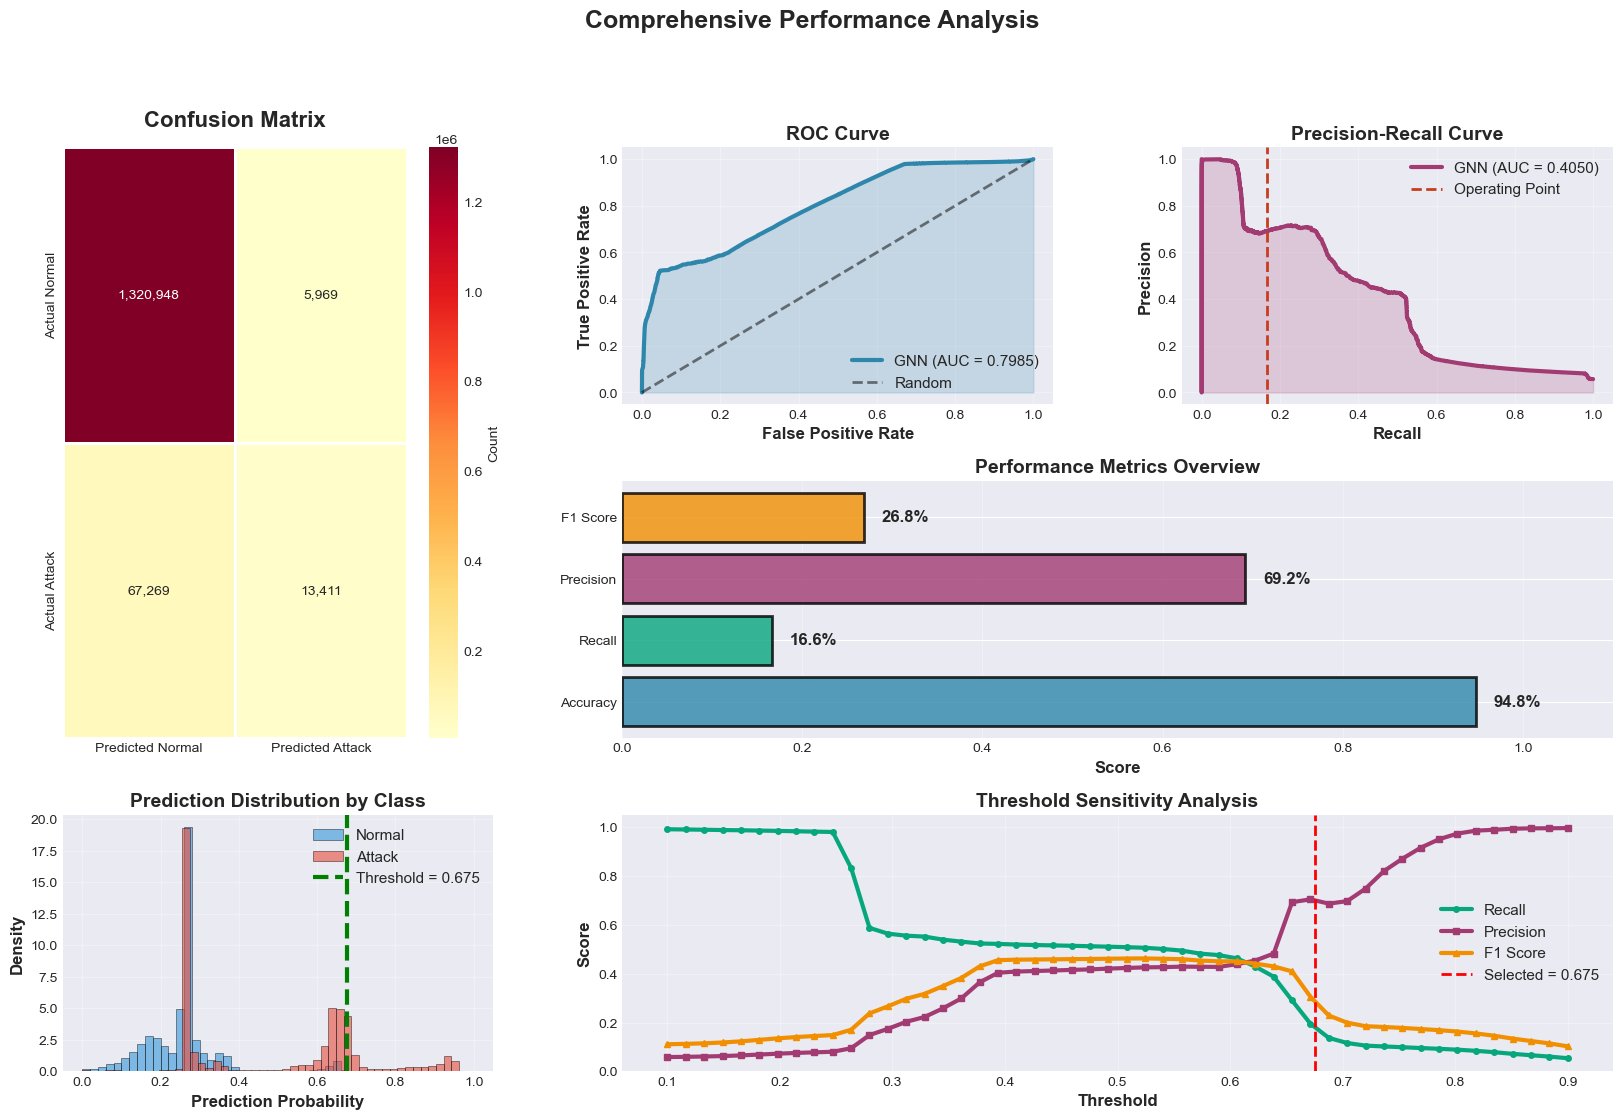

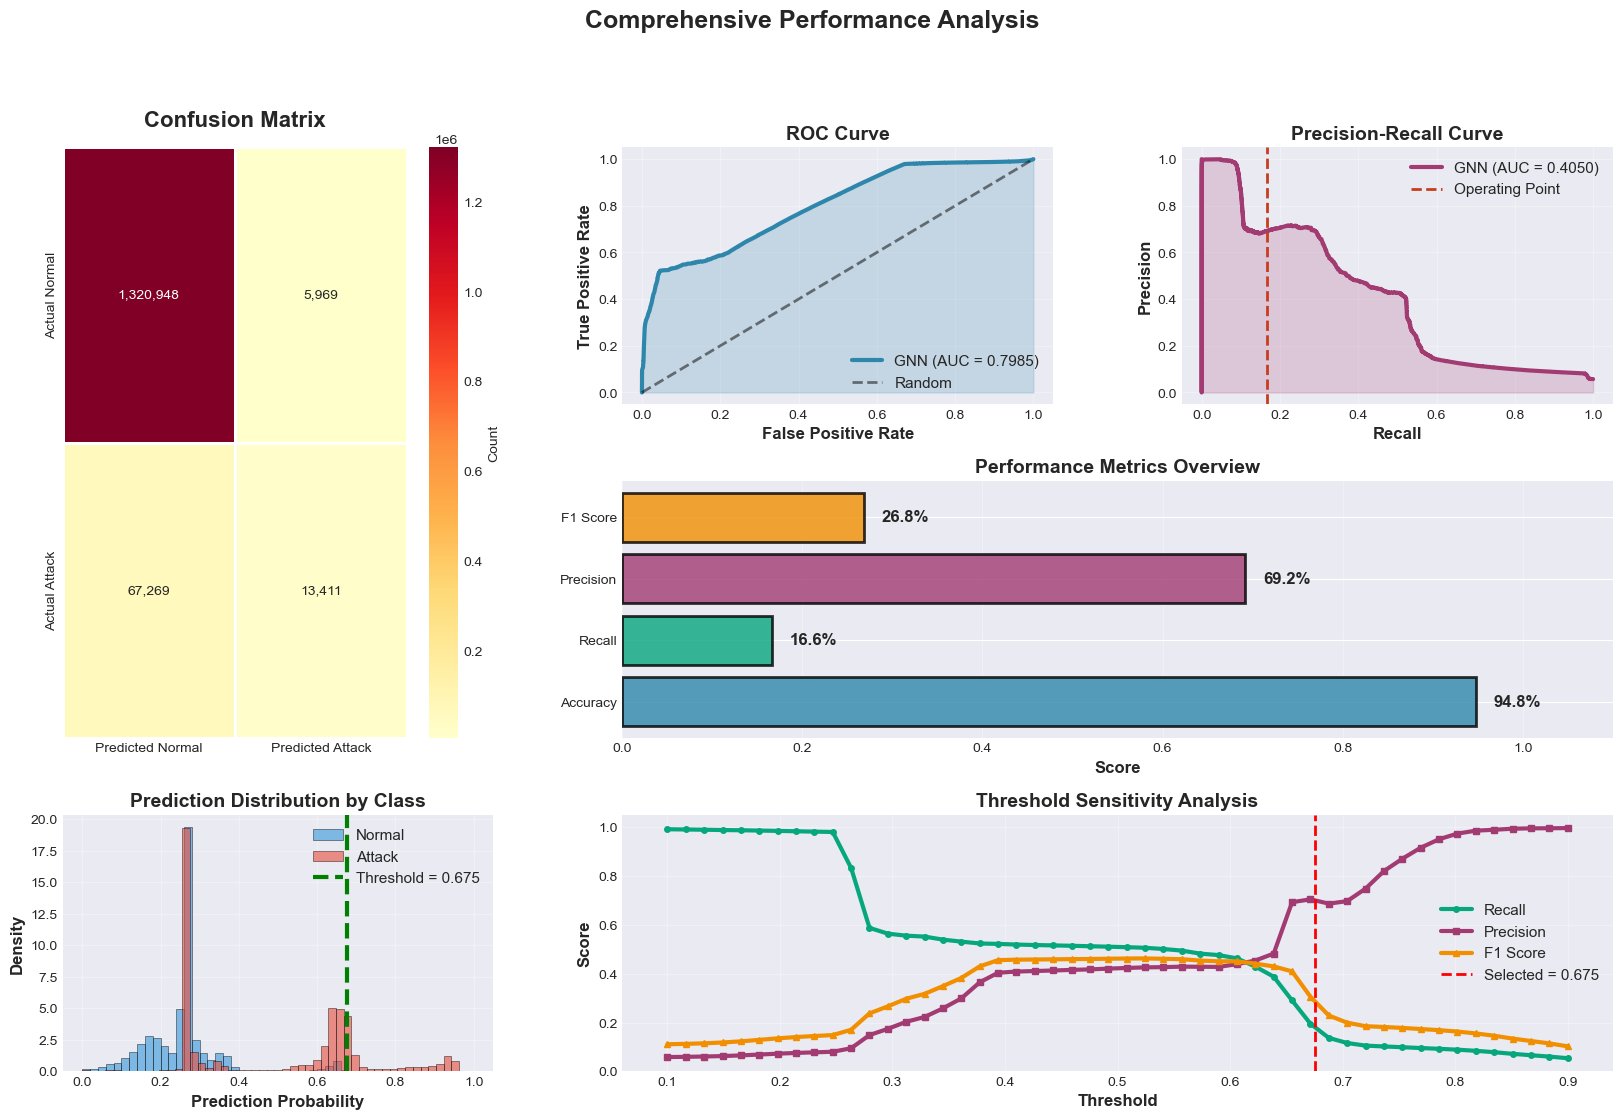

In [4]:
import numpy as np
from scipy.sparse import diags, csr_matrix
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class AdvancedGNN:
    def __init__(self, n_features, hidden_dims=[256, 128, 64], dropout=0.4, n_heads=4):
        self.n_features = n_features
        self.hidden_dims = hidden_dims
        self.dropout = dropout
        self.n_heads = n_heads

        np.random.seed(42)
        self.weights = []
        self.biases = []

        self.attention_weights = []

        prev_dim = n_features
        for idx, hidden_dim in enumerate(hidden_dims):
            self.weights.append(
                np.random.randn(prev_dim, hidden_dim) * np.sqrt(2.0 / prev_dim)
            )
            self.biases.append(np.zeros(hidden_dim))

            if idx == 0:
                head_weights = []
                for _ in range(n_heads):
                    head_weights.append(np.random.randn(prev_dim, 1) * 0.01)
                self.attention_weights.append(head_weights)

            prev_dim = hidden_dim

        self.W_out = np.random.randn(hidden_dims[-1], 1) * np.sqrt(2.0 / hidden_dims[-1])
        self.b_out = np.zeros(1)

        self.bn_gamma = [np.ones(dim) for dim in hidden_dims]
        self.bn_beta = [np.zeros(dim) for dim in hidden_dims]

    def leaky_relu(self, x, alpha=0.2):
        return np.where(x > 0, x, alpha * x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def batch_norm(self, x, gamma, beta, epsilon=1e-5):
        mean = np.mean(x, axis=0)
        var = np.var(x, axis=0)
        x_normalized = (x - mean) / np.sqrt(var + epsilon)
        return gamma * x_normalized + beta

    def multi_head_attention_aggregate(self, X, adj_matrix):
        n_samples = X.shape[0]
        aggregated_heads = []

        for head_weights in self.attention_weights[0]:
            attention_scores = X @ head_weights
            attention_scores = np.exp(attention_scores - attention_scores.max())

            attention_scores_flat = attention_scores.flatten()

            adj_dense = adj_matrix.toarray() if hasattr(adj_matrix, 'toarray') else adj_matrix
            weighted_adj = adj_dense * attention_scores_flat[:, np.newaxis]

            row_sums = weighted_adj.sum(axis=1)
            row_sums[row_sums == 0] = 1
            normalized_adj = weighted_adj / row_sums[:, np.newaxis]

            aggregated = normalized_adj @ X
            aggregated_heads.append(aggregated)

        multi_head_output = np.mean(aggregated_heads, axis=0)
        return multi_head_output

    def forward(self, X, adj_matrix, training=False):
        h = X
        layer_outputs = []

        for i, (W, b, gamma, beta) in enumerate(zip(self.weights, self.biases,
                                                      self.bn_gamma, self.bn_beta)):
            if i == 0 and len(self.attention_weights) > 0:
                neighbor_feats = self.multi_head_attention_aggregate(h, adj_matrix)
            else:
                degrees = np.array(adj_matrix.sum(axis=1)).flatten()
                degrees[degrees == 0] = 1
                D_inv = diags(1.0 / degrees)
                neighbor_feats = (D_inv @ adj_matrix) @ h

            h_new = neighbor_feats @ W + b

            h_new = self.batch_norm(h_new, gamma, beta)

            h_new = self.leaky_relu(h_new)

            if training and self.dropout > 0:
                mask = np.random.binomial(1, 1 - self.dropout, h_new.shape)
                h_new = h_new * mask / (1 - self.dropout)

            if h.shape[1] == h_new.shape[1]:
                h = 0.7 * h_new + 0.3 * h
            else:
                h = h_new

            layer_outputs.append(h)

        # Output
        output = self.sigmoid(h @ self.W_out + self.b_out)
        return output.flatten(), layer_outputs

    def fit(self, X, y, adj_matrix, X_val=None, y_val=None, adj_val=None,
            epochs=200, lr=0.005, batch_size=2000, patience=20):
        from sklearn.metrics import precision_recall_curve as pr_curve

        n_samples = len(y)
        n_batches = (n_samples + batch_size - 1) // batch_size

        n_pos = np.sum(y)
        n_neg = len(y) - n_pos
        print(f"  Training: {n_samples:,} samples | Normal: {n_neg:,} | Attack: {n_pos:,}")

        best_val_f1 = 0
        patience_counter = 0
        best_weights = None

        initial_lr = lr

        for epoch in range(epochs):
            current_lr = initial_lr * (0.95 ** (epoch // 20))

            epoch_loss = 0
            indices = np.random.permutation(n_samples)

            for batch_idx in range(n_batches):
                start_idx = batch_idx * batch_size
                end_idx = min((batch_idx + 1) * batch_size, n_samples)
                batch_indices = indices[start_idx:end_idx]

                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                adj_batch = adj_matrix[batch_indices][:, batch_indices]

                predictions, layer_outputs = self.forward(X_batch, adj_batch, training=True)

                gamma = 3.0
                alpha = 0.85

                y_pred_clip = np.clip(predictions, 1e-7, 1 - 1e-7)
                pt = np.where(y_batch == 1, y_pred_clip, 1 - y_pred_clip)
                focal_weight = (1 - pt) ** gamma

                loss = -np.mean(
                    focal_weight * (
                        alpha * y_batch * np.log(y_pred_clip) +
                        (1 - alpha) * (1 - y_batch) * np.log(1 - y_pred_clip)
                    )
                )
                epoch_loss += loss

                d_output = (predictions - y_batch) * focal_weight
                d_output = d_output * np.where(y_batch == 1, alpha, 1 - alpha)

                d_output = np.clip(d_output, -5, 5)

                h_last = layer_outputs[-1]
                grad_W_out = h_last.T @ d_output.reshape(-1, 1) / len(y_batch)
                grad_b_out = np.mean(d_output)

                self.W_out -= current_lr * grad_W_out
                self.b_out -= current_lr * grad_b_out

                d_h = d_output.reshape(-1, 1) * self.W_out.T
                d_h = d_h * (layer_outputs[-1] > 0)

                if len(layer_outputs) > 1:
                    h_prev = layer_outputs[-2]
                else:
                    h_prev = X_batch

                degrees = np.array(adj_batch.sum(axis=1)).flatten()
                degrees[degrees == 0] = 1
                D_inv = diags(1.0 / degrees)
                h_prev_agg = (D_inv @ adj_batch) @ h_prev

                grad_W = h_prev_agg.T @ d_h / len(y_batch)
                grad_b = np.mean(d_h, axis=0)

                self.weights[-1] -= current_lr * grad_W
                self.biases[-1] -= current_lr * grad_b

            avg_loss = epoch_loss / n_batches

            if epoch % 10 == 0 and X_val is not None:
                val_pred_proba = self.predict_proba(X_val, adj_val, batch_size=batch_size)

                precision, recall, thresholds = pr_curve(y_val, val_pred_proba)
                f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
                best_threshold_idx = np.argmax(f1_scores)
                best_threshold = thresholds[best_threshold_idx] if best_threshold_idx < len(thresholds) else 0.5

                val_pred = (val_pred_proba > best_threshold).astype(int)
                val_f1 = f1_score(y_val, val_pred)
                val_recall = recall[best_threshold_idx]
                val_precision = precision[best_threshold_idx]

                print(f"  Epoch {epoch:3d} | Loss: {avg_loss:.4f} | LR: {current_lr:.5f} | "
                      f"Val F1: {val_f1:.4f} | Recall: {val_recall:5.1%} | Precision: {val_precision:5.1%}")

                if val_f1 > best_val_f1:
                    best_val_f1 = val_f1
                    patience_counter = 0
                    best_weights = {
                        'weights': [w.copy() for w in self.weights],
                        'biases': [b.copy() for b in self.biases],
                        'W_out': self.W_out.copy(),
                        'b_out': self.b_out.copy()
                    }
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print(f"  Early stopping at epoch {epoch}")
                        break

        if best_weights is not None:
            self.weights = best_weights['weights']
            self.biases = best_weights['biases']
            self.W_out = best_weights['W_out']
            self.b_out = best_weights['b_out']
            print(f"  ✓ Restored best model (Val F1: {best_val_f1:.4f})")

    def predict_proba(self, X, adj_matrix, batch_size=2000):
        n_samples = len(X)
        predictions = np.zeros(n_samples)

        for start_idx in range(0, n_samples, batch_size):
            end_idx = min(start_idx + batch_size, n_samples)
            X_batch = X[start_idx:end_idx]
            adj_batch = adj_matrix[start_idx:end_idx][:, start_idx:end_idx]

            batch_pred, _ = self.forward(X_batch, adj_batch, training=False)
            predictions[start_idx:end_idx] = batch_pred

        return predictions

    def get_embeddings(self, X, adj_matrix, batch_size=2000):
        n_samples = len(X)
        embeddings = []

        for start_idx in range(0, n_samples, batch_size):
            end_idx = min(start_idx + batch_size, n_samples)
            X_batch = X[start_idx:end_idx]
            adj_batch = adj_matrix[start_idx:end_idx][:, start_idx:end_idx]

            _, layer_outputs = self.forward(X_batch, adj_batch, training=False)
            embeddings.append(layer_outputs[-1])

        return np.vstack(embeddings)


def build_enhanced_graph(X, y=None, n_neighbors=20):
    print(f"  Building enhanced k-NN graph (k={n_neighbors})...")

    graph = kneighbors_graph(
        X, n_neighbors=n_neighbors,
        metric='euclidean',
        mode='connectivity',
        include_self=True,
        n_jobs=-1
    )

    print(f"  Graph: {graph.shape[0]:,} nodes, {graph.nnz:,} edges")
    return graph


def find_optimal_threshold(y_true, y_pred_proba, target_recall=0.85):
    from sklearn.metrics import precision_recall_curve as pr_curve

    precision, recall, thresholds = pr_curve(y_true, y_pred_proba)

    valid_indices = recall >= target_recall

    if np.any(valid_indices):
        valid_precisions = precision[valid_indices]
        best_idx = np.where(valid_indices)[0][np.argmax(valid_precisions)]
        optimal_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    else:
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        best_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

    return optimal_threshold, precision[best_idx], recall[best_idx]


def create_beautiful_plots(y_true, y_pred_proba, y_pred, metrics_dict, threshold):

    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    colors = {
        'primary': '#2E86AB',
        'secondary': '#A23B72',
        'accent': '#F18F01',
        'success': '#06A77D',
        'danger': '#C73E1D',
        'normal': '#3498db',
        'attack': '#e74c3c'
    }

    ax1 = fig.add_subplot(gs[0:2, 0])
    cm = np.array([
        [metrics_dict['TN'], metrics_dict['FP']],
        [metrics_dict['FN'], metrics_dict['TP']]
    ])

    sns.heatmap(cm, annot=True, fmt=',d', cmap='YlOrRd',
                cbar_kws={'label': 'Count'},
                xticklabels=['Predicted Normal', 'Predicted Attack'],
                yticklabels=['Actual Normal', 'Actual Attack'],
                ax=ax1, linewidths=2, linecolor='white')
    ax1.set_title('Confusion Matrix', fontsize=16, fontweight='bold', pad=15)

    ax2 = fig.add_subplot(gs[0, 1])
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    ax2.plot(fpr, tpr, color=colors['primary'], linewidth=3,
             label=f'GNN (AUC = {roc_auc:.4f})')
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5, label='Random')
    ax2.fill_between(fpr, tpr, alpha=0.2, color=colors['primary'])
    ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
    ax2.legend(loc='lower right', fontsize=11)
    ax2.grid(alpha=0.3)

    ax3 = fig.add_subplot(gs[0, 2])
    from sklearn.metrics import precision_recall_curve as pr_curve
    precision, recall, thresholds = pr_curve(y_true, y_pred_proba)
    pr_auc = auc(recall, precision)

    ax3.plot(recall, precision, color=colors['secondary'], linewidth=3,
             label=f'GNN (AUC = {pr_auc:.4f})')
    ax3.axvline(x=metrics_dict['Recall'], color=colors['danger'],
                linestyle='--', linewidth=2, label=f'Operating Point')
    ax3.fill_between(recall, precision, alpha=0.2, color=colors['secondary'])
    ax3.set_xlabel('Recall', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax3.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    ax3.legend(loc='upper right', fontsize=11)
    ax3.grid(alpha=0.3)

    ax4 = fig.add_subplot(gs[1, 1:])
    metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    metrics_values = [
        metrics_dict['Accuracy'],
        metrics_dict['Recall'],
        metrics_dict['Precision'],
        metrics_dict['F1']
    ]

    bars = ax4.barh(metrics_names, metrics_values,
                    color=[colors['primary'], colors['success'],
                           colors['secondary'], colors['accent']],
                    alpha=0.8, edgecolor='black', linewidth=2)

    for i, (bar, val) in enumerate(zip(bars, metrics_values)):
        ax4.text(val + 0.02, i, f'{val:.1%}',
                va='center', fontsize=12, fontweight='bold')

    ax4.set_xlim(0, 1.1)
    ax4.set_xlabel('Score', fontsize=12, fontweight='bold')
    ax4.set_title('Performance Metrics Overview', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)

    ax5 = fig.add_subplot(gs[2, 0])

    normal_probs = y_pred_proba[y_true == 0]
    attack_probs = y_pred_proba[y_true == 1]

    ax5.hist(normal_probs, bins=50, alpha=0.6, color=colors['normal'],
             label='Normal', density=True, edgecolor='black', linewidth=0.5)
    ax5.hist(attack_probs, bins=50, alpha=0.6, color=colors['attack'],
             label='Attack', density=True, edgecolor='black', linewidth=0.5)
    ax5.axvline(x=threshold, color='green', linestyle='--', linewidth=3,
                label=f'Threshold = {threshold:.3f}')
    ax5.set_xlabel('Prediction Probability', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax5.set_title('Prediction Distribution by Class', fontsize=14, fontweight='bold')
    ax5.legend(fontsize=11)
    ax5.grid(alpha=0.3)

    ax6 = fig.add_subplot(gs[2, 1:])

    test_thresholds = np.linspace(0.1, 0.9, 50)
    recalls = []
    precisions = []
    f1s = []

    for thresh in test_thresholds:
        pred_temp = (y_pred_proba > thresh).astype(int)
        tp = np.sum((pred_temp == 1) & (y_true == 1))
        fp = np.sum((pred_temp == 1) & (y_true == 0))
        fn = np.sum((pred_temp == 0) & (y_true == 1))

        recall_temp = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision_temp = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1_temp = 2 * precision_temp * recall_temp / (precision_temp + recall_temp) if (precision_temp + recall_temp) > 0 else 0

        recalls.append(recall_temp)
        precisions.append(precision_temp)
        f1s.append(f1_temp)

    ax6.plot(test_thresholds, recalls, linewidth=3, color=colors['success'],
             label='Recall', marker='o', markersize=4)
    ax6.plot(test_thresholds, precisions, linewidth=3, color=colors['secondary'],
             label='Precision', marker='s', markersize=4)
    ax6.plot(test_thresholds, f1s, linewidth=3, color=colors['accent'],
             label='F1 Score', marker='^', markersize=4)
    ax6.axvline(x=threshold, color='red', linestyle='--', linewidth=2,
                label=f'Selected = {threshold:.3f}')
    ax6.set_xlabel('Threshold', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax6.set_title('Threshold Sensitivity Analysis', fontsize=14, fontweight='bold')
    ax6.legend(loc='best', fontsize=11)
    ax6.grid(alpha=0.3)
    ax6.set_ylim(0, 1.05)

    plt.suptitle('Comprehensive Performance Analysis',
                 fontsize=18, fontweight='bold', y=0.995)

    plt.show()

    return fig


print("\n" + "="*70)
print("GNN FOR SCADA IDS")
print("="*70)

print("\nData Preparation")
print("-" * 70)

X_train_gnn, X_val_gnn, y_train_gnn, y_val_gnn = train_test_split(
    X_train_scaled, y_train.values,
    test_size=0.15, stratify=y_train, random_state=42
)

max_train = 250000
max_val = 40000

if len(X_train_gnn) > max_train:
    indices, _ = train_test_split(np.arange(len(X_train_gnn)),
                                   train_size=max_train, stratify=y_train_gnn, random_state=42)
    X_train_gnn, y_train_gnn = X_train_gnn[indices], y_train_gnn[indices]

if len(X_val_gnn) > max_val:
    indices, _ = train_test_split(np.arange(len(X_val_gnn)),
                                   train_size=max_val, stratify=y_val_gnn, random_state=42)
    X_val_gnn, y_val_gnn = X_val_gnn[indices], y_val_gnn[indices]

print(f"Training: {len(X_train_gnn):,} samples")
print(f"Validation: {len(X_val_gnn):,} samples")
print(f"Test: {len(X_test_scaled):,} samples")

print("\nBuilding Graph Structures.")
print("-" * 70)
train_graph = build_enhanced_graph(X_train_gnn, y_train_gnn, n_neighbors=20)
val_graph = build_enhanced_graph(X_val_gnn, y_val_gnn, n_neighbors=20)
test_graph = build_enhanced_graph(X_test_scaled, n_neighbors=20)


print("\nTraining Advanced GNN.")
print("-" * 70)

gnn = AdvancedGNN(
    n_features=X_train_scaled.shape[1],
    hidden_dims=[256, 128, 64],
    dropout=0.4,
    n_heads=4
)

gnn.fit(X_train_gnn, y_train_gnn, train_graph,
        X_val=X_val_gnn, y_val=y_val_gnn, adj_val=val_graph,
        epochs=200, lr=0.005, batch_size=2000, patience=20)


train_embeddings = gnn.get_embeddings(X_train_gnn, train_graph)
val_embeddings = gnn.get_embeddings(X_val_gnn, val_graph)

print("Training Gradient Boosting on embeddings...")
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    subsample=0.8
)
gb_model.fit(train_embeddings, y_train_gnn)


print("\nThreshold Optimization")
print("-" * 70)

gnn_val_proba = gnn.predict_proba(X_val_gnn, val_graph)
gb_val_proba = gb_model.predict_proba(val_embeddings)[:, 1]
ensemble_val_proba = 0.6 * gnn_val_proba + 0.4 * gb_val_proba

threshold, precision, recall = find_optimal_threshold(y_val_gnn, ensemble_val_proba, target_recall=0.85)
print(f"  Optimal threshold: {threshold:.4f}")
print(f"  At this threshold → Recall: {recall:.2%}, Precision: {precision:.2%}")

print("\nEvaluation on Test Set")
print("-" * 70)

test_embeddings = gnn.get_embeddings(X_test_scaled, test_graph)
gnn_test_proba = gnn.predict_proba(X_test_scaled, test_graph)
gb_test_proba = gb_model.predict_proba(test_embeddings)[:, 1]
ensemble_test_proba = 0.6 * gnn_test_proba + 0.4 * gb_test_proba

test_pred = (ensemble_test_proba > threshold).astype(int)

tp = np.sum((test_pred == 1) & (y_test == 1))
fp = np.sum((test_pred == 1) & (y_test == 0))
tn = np.sum((test_pred == 0) & (y_test == 0))
fn = np.sum((test_pred == 0) & (y_test == 1))

metrics = {
    'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
    'Accuracy': (tp + tn) / len(y_test),
    'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
    'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
    'FAR': fp / (fp + tn) if (fp + tn) > 0 else 0,
    'UND': fn / (fn + tp) if (fn + tp) > 0 else 0,
    'F1': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0
}

# Print results
print("\n" + "="*70)
print("RESULTS")
print("="*70)

print("Confusion Matrix:")
print(f"  TN: {tn:,}  |  FP: {fp:,}")
print(f"  FN: {fn:,}  |  TP: {tp:,}\n")

print("Performance Metrics:")
print(f"  Accuracy (ACC):        {metrics['Accuracy']*100:6.2f}%")
print(f"  Recall (Detection):    {metrics['Recall']*100:6.2f}%")
print(f"  Precision:             {metrics['Precision']*100:6.2f}%")
print(f"  F1 Score:              {metrics['F1']:.4f}")
print(f"  False Alarm Rate (FAR): {metrics['FAR']*100:6.2f}%")
print(f"  Un-Detection Rate (UND): {metrics['UND']*100:6.2f}%")

print("\nModel Details:")
print(f"  Training samples: {len(X_train_gnn):,}")
print(f"  Validation samples: {len(X_val_gnn):,}")
print(f"  Test samples: {len(X_test_scaled):,}")
print(f"  Threshold used: {threshold:.4f}")
print("="*70)

print("\nGenerating Visualizations")
print("-" * 70)

create_beautiful_plots(
    y_true=y_test.values if hasattr(y_test, "values") else y_test,
    y_pred_proba=ensemble_test_proba,
    y_pred=test_pred,
    metrics_dict={
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Accuracy': metrics['Accuracy'],
        'Recall': metrics['Recall'],
        'Precision': metrics['Precision'],
        'F1': metrics['F1']
    },
    threshold=threshold
)
